# LimpiezaEDA.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split

## Limpieza de datos.

In [2]:
# Creo el Dataframe con los datos del csv de "coches_train.csv"
df = pd.read_csv("../data/raw/coches-de-segunda-mano-sample.csv")
df.head()

,url,company,make,model,version,price,price_financed,fuel,year,kms,...,doors,shift,color,photos,is_professional,dealer,province,country,publish_date,insert_date
0,e158ae0ca53119ca199c28c36b5c2fcd,9881bcdd5a0ad4733037b3fb25e69c3a,SEAT,Toledo,SEAT Toledo 4p.,950,NaN,Diésel,2000.0,227000,...,4,Manual,Verde,5,False,0f4bb8455d27349b8273109b66a847f3,Navarra,Spain,2020-12-18 10:47:13,2021-01-15 00:00:00
1,ff267ebb7e700246f47f84f3db660b4b,9881bcdd5a0ad4733037b3fb25e69c3a,CITROEN,C1,CITROEN C1 PureTech 60KW 82CV Feel 5p.,6200,NaN,Gasolina,2017.0,50071,...,5,Manual,Blanco,6,True,Autos Raymara,Tenerife,Spain,2021-01-02 11:25:40,2021-01-15 00:00:00
2,de4b02db28ea7786c622b969be10c7c7,9881bcdd5a0ad4733037b3fb25e69c3a,FORD,Transit Connect,FORD Transit Connect Van 1.5 TDCi 100cv Ambien...,7851,7024.0,Diésel,2016.0,103000,...,4,Manual,Blanco,10,True,Auto 96,Barcelona,Spain,2020-12-16 10:51:45,2021-01-15 00:00:00
3,0449972a4d07594acf92e9a7dd28b39c,9881bcdd5a0ad4733037b3fb25e69c3a,VOLKSWAGEN,Caravelle,VOLKSWAGEN Caravelle Largo 2.0 TDI 140 Comfort...,19426,NaN,Diésel,2014.0,120000,...,4,Manual,Blanco,9,True,Inniauto,Navarra,Spain,2020-11-25 11:09:14,2021-01-15 00:00:00
4,12c4fa49bd4fdf23f19ecf396d3f02ef,9881bcdd5a0ad4733037b3fb25e69c3a,FORD,Transit,FORD Transit 350 96kW L4 Ambiente Propulsion T...,22850,22800.0,Diésel,2017.0,107000,...,2,Manual,Blanco,4,True,"Autofleet España,s.l",Sevilla,Spain,2021-01-12 20:00:34,2021-01-15 00:00:00


In [3]:
# Elimino las columnas que no necesito.
df = df.drop(columns=["url", "company", "model", "version", "color", "shift",
                       "photos", "is_professional", "price_financed",
                         "dealer", "province", "country",
                           "publish_date", "insert_date"])

In [4]:
# Creo la columna antiquity para saber los años de antiguedad del coche
year_actual = datetime.now().year
df["antiquity"] = year_actual - df["year"]

In [5]:
# Elimino los NaN.
df = df.dropna()

In [6]:
df.head()

,make,price,fuel,year,kms,power,doors,antiquity
1,CITROEN,6200,Gasolina,2017.0,50071,82.0,5,6.0
2,FORD,7851,Diésel,2016.0,103000,100.0,4,7.0
3,VOLKSWAGEN,19426,Diésel,2014.0,120000,140.0,4,9.0
4,FORD,22850,Diésel,2017.0,107000,130.0,2,6.0
5,PEUGEOT,11490,Gasolina,2016.0,78665,130.0,5,7.0


<Axes: xlabel='price'>

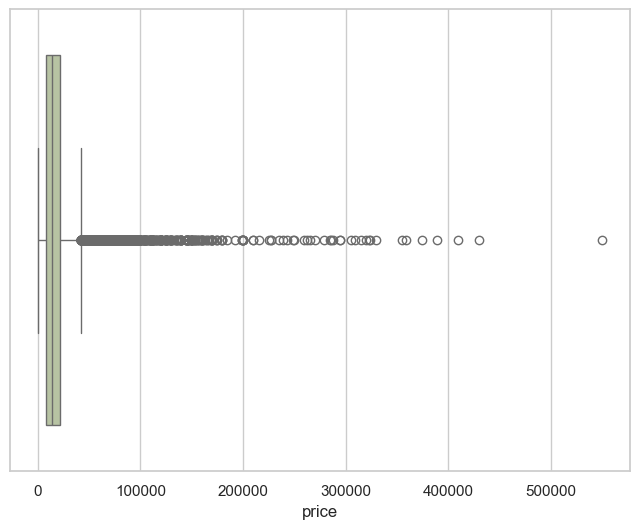

In [7]:
# Visualizo en un grafico de caja los Outliers.
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.boxplot(x=df["price"], color="#b8c99d")

In [8]:
# Elimino todos coches con un precio mayor de 50 mil para quitarme Outliers.
coches_lujo = df['price'] > 40000
df_lujo = df[coches_lujo]
df = df.drop(df[coches_lujo].index)

<Axes: xlabel='price'>

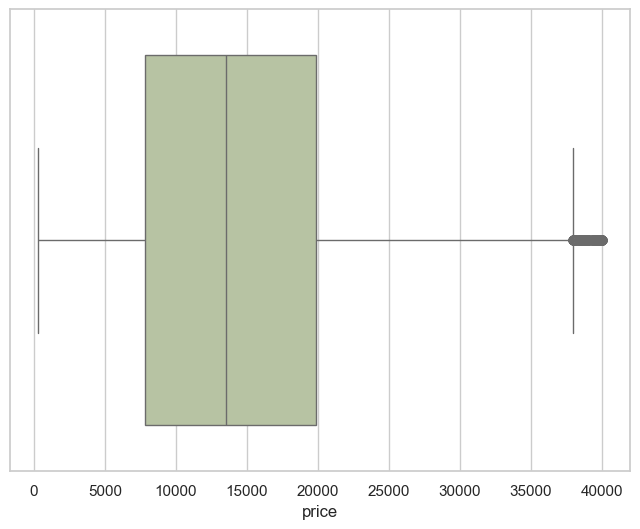

In [9]:
# Vuelvo a visualizar en un grafico de caja los Outliers.
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.boxplot(x=df["price"], color="#b8c99d")

In [10]:
# Unifico en solo dos posibilidades la columna de puertas.
df["doors"] = df["doors"].replace(5, 4)
df["doors"] = df["doors"].replace(3, 2)
df["doors"].unique()

array([4, 2], dtype=int64)

<Axes: >

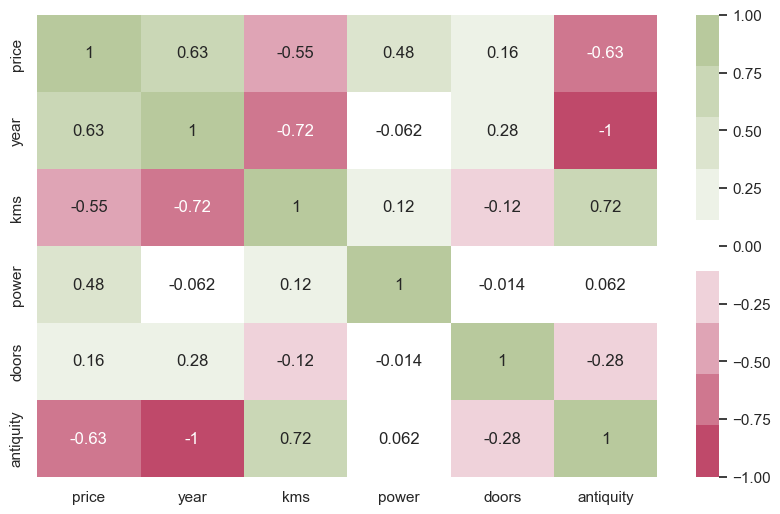

In [13]:
colors = ["#bf496a", "#cf778f", "#dfa4b5", "#efd2da", "#ffffff", "#edf2e7", "#dce4ce", "#cad7b6", "#b8c99d"]
cmap = ListedColormap(sns.color_palette(colors).as_hex())

sns.set(rc={'figure.figsize':(10, 6)})
sns.heatmap(df.drop(columns=["make", "fuel"]).corr(), cmap=cmap, annot= True)

In [21]:
# Guardo el DataFrame en un csv.
df.to_csv("../data/processed/coches_processed.csv", index=False)

In [22]:
# Separo el DataFrame en Train y Test, y los guardo en archivos CSV separados.
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

train_df.to_csv("../data/train/coches_train.csv", index=False)
test_df.to_csv("../data/test/coches_test.csv", index=False)